In [19]:
import energistream as es # Imports the Energiscore Library
import pandas as pd # Imports the Pandas Library for Dataframe handling
import datetime as dt # Imports the datetime Library for timeseries handling
import numpy as np # Imports the Numpy Library for series handling
import scipy as sp # Imports scipy package

import seaborn as sns # Imports seaborn for graph generation
import matplotlib # Imports matplotlib for math functionality

In [20]:
%load_ext autoreload 
%autoreload 2 
# Running autoreload will reload any updated modules before running a cell. 
%pylab inline 
%matplotlib inline 
#pylab inline and matplotlib inline will cause charts to be displayed within ipython notebook.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [141]:
stream = es.EnergiStreamClient('USER', 'PASS', include_sensors=True) 

In [22]:
stream.get_weather(weather_id = 102, start = '12/29/2014', end = '1/29/2015').head()

,c,f,h
2014-12-29 00:00:00+00:00,15.6,60,42
2014-12-29 01:00:00+00:00,15.0,59,48
2014-12-29 02:00:00+00:00,13.3,56,55
2014-12-29 03:00:00+00:00,13.3,56,53
2014-12-29 04:00:00+00:00,12.2,54,57


In [23]:
stream.get_energy(3505, start = '12/29/2014', end = '1/29/2015', tz = 'local').head()

,activeEnergy,currentRMS,powerFactor,reactiveEnergy,sensorId,totalEnergy,voltageRMS
2014-12-29 00:01:00-08:00,43566.626,27.44,0.93,13801.665,3505,45700.513,490.52
2014-12-29 00:02:00-08:00,43566.850,27.74,0.94,13801.740,3505,45700.749,490.00
2014-12-29 00:03:00-08:00,43567.077,30.02,0.93,13801.816,3505,45700.989,489.29
2014-12-29 00:04:00-08:00,43567.310,28.41,0.93,13801.901,3505,45701.236,491.54
2014-12-29 00:05:00-08:00,43567.541,27.81,0.94,13801.986,3505,45701.482,491.18


In [24]:
stream.search_group_tree('Engineering',case=False).head()

,name,description,load_type,sensorGroups,sensors,groupMultiplier,time_zone,weatherStationId,base_group_level
sensorGroupId,,,,,,,,,
2177,Rockwell Engineering Center - Sub Groups,Rockwell Engineering Center - Sub Groups,building,"Int64Index([2179, 2178, 2180], dtype='int64')",None,"[1, 1, 1]",America/Los_Angeles,102,1
2258,Engineering and Computing Trailer - Sub Groups,Engineering and Computing Trailer - Sub Groups,building,None,"[{u'timeZoneId': 67, u'sourceTypeId': 1, u'des...",None,America/Los_Angeles,102,1
157,Engineering Laboratory Facility - Sub Groups,Feed to ELF Sub Loads,building,"Int64Index([196, 193, 192, 195, 194], dtype='i...",None,"[1, 1, 1, 1, 1]",America/Los_Angeles,102,1
255,Engineering Tower - Sub Groups,Feed to ET Sub Groups,building,"Int64Index([258, 256, 257, 262, 263, 260, 261,...",None,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",America/Los_Angeles,102,1
265,Engineering Lecture Hall - Sub Groups,Feed ELH Sub Groups,building,"Int64Index([274, 266, 271, 267, 270, 273, 272]...",None,"[1, 1, 1, 3, 3, 3, 3]",America/Los_Angeles,102,1


In [25]:
stream.groups[stream.groups.base_group_level == 0].head()

,name,description,load_type,sensorGroups,sensors,groupMultiplier,time_zone,weatherStationId,base_group_level
sensorGroupId,,,,,,,,,
216,UCI - MelRok Electric Meter Sub Groups,Feed to Individual Loads at UCI Buildings,campus,"Int64Index([2203, 2193, 2198, 2188, 2177, 2181...",None,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",America/Los_Angeles,102,0
734,UCI - Electric Distribution Loads,Electrical Meters that Distribute Electricity ...,campus,"Int64Index([732, 733, 1836, 1837, 1838, 1839, ...",None,"[1, 1, 1, 1, 1, 1, -1, 1, 1]",America/Los_Angeles,102,0
769,UCI - Building Heating & Chilled Water Meters,14 KEP-ES749 for 6 Buildings,campus,"Int64Index([774, 775, 772, 771, 776, 777, 1824...",None,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",America/Los_Angeles,102,0
1843,UCI - Total Electric Load,Total Electric Load for UCI Campus,campus,"Int64Index([735, 1842, 1484, 1483, 1486, 1485,...",None,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",America/Los_Angeles,102,0


In [26]:
stream.sensors.head()

,description,iconId,multiplier,name,properties,sensorFunctionTypeId,sensorGroupId,sourceTypeId,time_zone
sensorId,,,,,,,,,
8812,D40010000628-04,21,1,ECT B1,"[{u'name': u'Phase', u'value': u'A'}]",1,2258,1,America/Los_Angeles
8813,D40010000628-05,21,1,ECT B2,"[{u'name': u'Phase', u'value': u'C'}]",1,2258,1,America/Los_Angeles
8814,D40010000628-06,21,1,ECT B3,"[{u'name': u'Phase', u'value': u'B'}]",1,2258,1,America/Los_Angeles
8815,D40010000628-07,21,1,ECT B4,"[{u'name': u'Phase', u'value': u'A'}]",1,2258,1,America/Los_Angeles
8816,D40010000628-08,21,1,ECT B5,"[{u'name': u'Phase', u'value': u'C'}]",1,2258,1,America/Los_Angeles


In [29]:
stream.get_boards.head()

,currentConfigVersion,displayName,firmwareVersion,manufacturer,model,sensors,timeZoneId
serialNumber,,,,,,,
C20006000002,26,MSTB First Floor 2,1,MelRok Manufacturer,EN-12,"[{u'timeZoneId': 67, u'sourceTypeId': 1, u'nam...",67
C20006000003,21,MSTB First Floor 3,1,MelRok Manufacturer,EN-12,"[{u'timeZoneId': 67, u'sourceTypeId': 1, u'nam...",67
C20006000004,25,MSTB Second Floor,1,MelRok Manufacturer,EN-12,"[{u'timeZoneId': 67, u'sourceTypeId': 1, u'nam...",67
A30006000036,20,Aldrich Hall,1,MelRok Manufacturer,EN-12,"[{u'timeZoneId': 67, u'sourceTypeId': 1, u'nam...",67
A30006000041,18,Social Science LAB,1,MelRok Manufacturer,EN-12,"[{u'timeZoneId': 67, u'sourceTypeId': 1, u'nam...",67


In [28]:
stream.get_demand(157).head()

2015-01-26 11:29:59-08:00    50.667600
2015-01-26 11:44:59-08:00    48.961200
2015-01-26 11:59:59-08:00    48.903466
2015-01-26 12:14:59-08:00    49.121333
2015-01-26 12:29:59-08:00    48.301666
Name: kW, dtype: float64

In [34]:
sns.set(font='Bitstream Vera Sans')
sns.set_context('poster')
#sns.set_context("poster", font_scale=1.7)
sns.plotting_context()

{'axes.labelsize': 17.6,
 'axes.titlesize': 19.200000000000003,
 'figure.figsize': array([ 12.8,   8.8]),
 'grid.linewidth': 1.6,
 'legend.fontsize': 16.0,
 'lines.linewidth': 2.8000000000000003,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 11.200000000000001,
 'patch.linewidth': 0.48,
 'xtick.labelsize': 16.0,
 'xtick.major.pad': 11.200000000000001,
 'xtick.major.width': 1.6,
 'xtick.minor.width': 0.8,
 'ytick.labelsize': 16.0,
 'ytick.major.pad': 11.200000000000001,
 'ytick.major.width': 1.6,
 'ytick.minor.width': 0.8}

In [144]:
demand = stream.get_demand(216)
multi = 1.5
mask = (demand < 0) | (demand > demand.mean() + multi * demand.std())

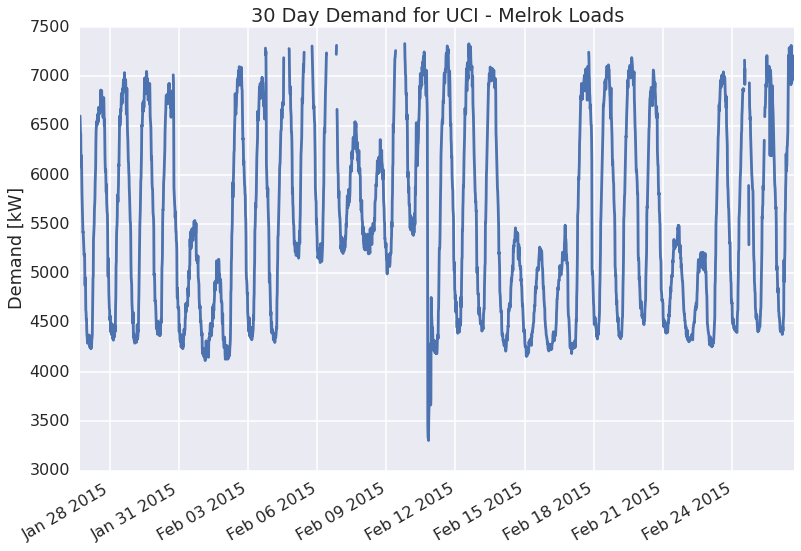

In [226]:
demand.mask(mask).plot()

plt.title('30 Day Demand for UCI - Melrok Loads')
plt.ylabel('Demand [kW]')

([<matplotlib.axis.XTick at 0x118450150>,
 <a list of 7 Text xticklabel objects>)

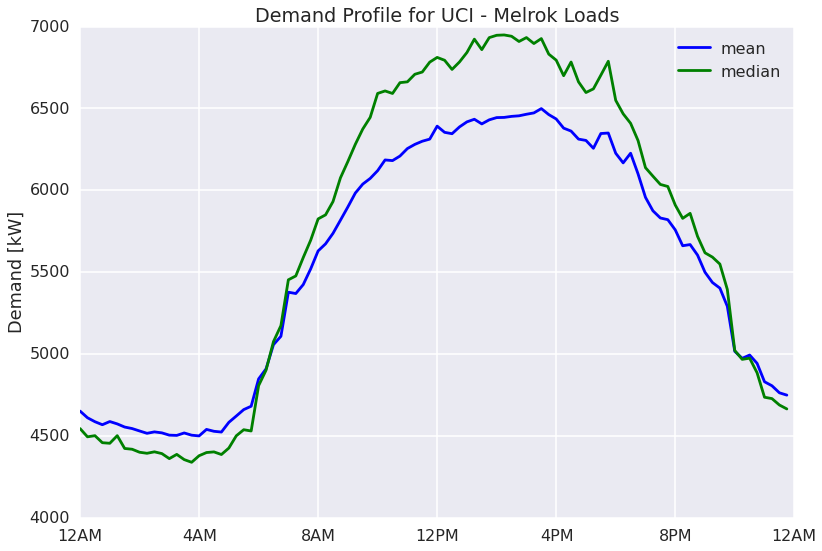

In [282]:
mean = demand.mask(mask).groupby([demand.index.hour,demand.index.minute]).mean().plot(color = 'b', label = 'mean')
median = demand.mask(mask).groupby([demand.index.hour,demand.index.minute]).median().plot(color = 'g', label = 'median')
legend()

plt.title('Demand Profile for UCI - Melrok Loads')
plt.ylabel('Demand [kW]')

plt.xticks( (16 * arange(7)),['12AM','4AM','8AM','12PM','4PM','8PM','12AM'])

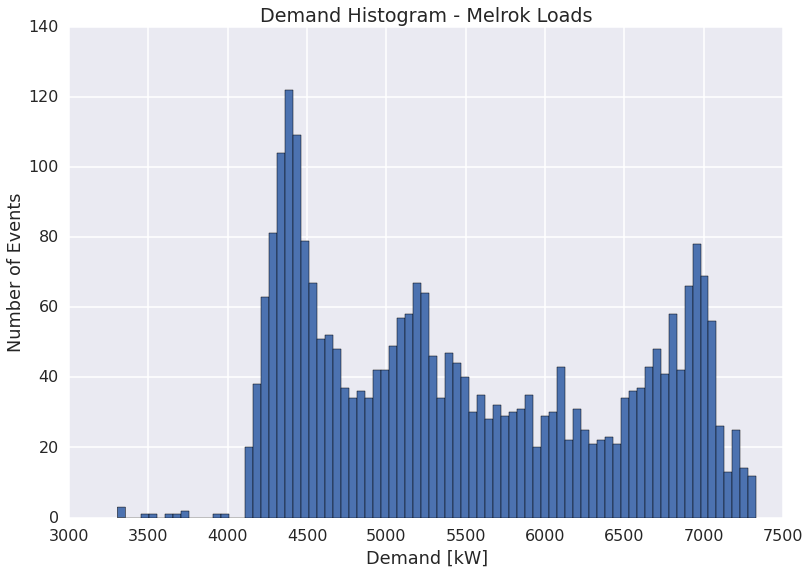

In [240]:
demand.mask(mask).hist(bins=80)

plt.title('Demand Histogram - Melrok Loads')
plt.ylabel('Number of Events')
plt.xlabel('Demand [kW]')